In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Dropout, Conv2D, MaxPooling2D

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = train.drop('label',axis=1)
y_train = train['label']

Text(0.5, 1.0, 'Number of images per digit')

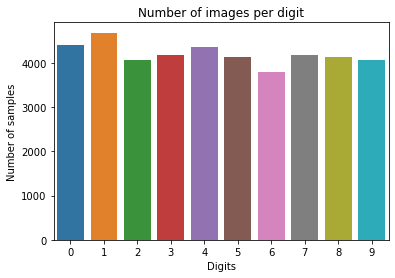

In [6]:
sns.barplot(x=y_train.unique(), y=y_train.value_counts())
plt.xlabel('Digits')
plt.ylabel('Number of samples')
plt.title('Number of images per digit')

In [7]:
x_train = np.array(x_train).reshape(-1,28,28,1)

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.3
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64, subset='training')
validation_generator = train_datagen.flow(x_train, y_train, batch_size=64,subset='validation')

In [9]:
model = Sequential([
    
    Input(shape=(28,28,1)),
    Conv2D(16, 8, activation='relu', padding='same'),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(32, 6, activation='relu', padding='same'),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [13]:
history=model.fit(train_generator, validation_data = validation_generator, epochs=200, callbacks=[early_stopping])

Epoch 1/200
460/460 [==============================] - 21s 42ms/step - loss: 1.3015 - accuracy: 0.5719 - val_loss: 0.6918 - val_accuracy: 0.7775
Epoch 2/200
460/460 [==============================] - 20s 43ms/step - loss: 0.3799 - accuracy: 0.8821 - val_loss: 0.1813 - val_accuracy: 0.9429
Epoch 3/200
460/460 [==============================] - 21s 46ms/step - loss: 0.2773 - accuracy: 0.9133 - val_loss: 0.1235 - val_accuracy: 0.9612
Epoch 4/200
460/460 [==============================] - 21s 45ms/step - loss: 0.2274 - accuracy: 0.9303 - val_loss: 0.1515 - val_accuracy: 0.9505
Epoch 5/200
460/460 [==============================] - 20s 44ms/step - loss: 0.2021 - accuracy: 0.9358 - val_loss: 0.1088 - val_accuracy: 0.9671
Epoch 6/200
460/460 [==============================] - 20s 44ms/step - loss: 0.1913 - accuracy: 0.9395 - val_loss: 0.1166 - val_accuracy: 0.9639
Epoch 7/200
460/460 [==============================] - 20s 44ms/step - loss: 0.1688 - accuracy: 0.9484 - val_loss: 0.1189 - val_ac

460/460 [==============================] - 21s 46ms/step - loss: 0.0691 - accuracy: 0.9786 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 58/200
460/460 [==============================] - 21s 46ms/step - loss: 0.0732 - accuracy: 0.9772 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 59/200
460/460 [==============================] - 21s 46ms/step - loss: 0.0815 - accuracy: 0.9743 - val_loss: 0.0415 - val_accuracy: 0.9871
Epoch 60/200
460/460 [==============================] - 22s 47ms/step - loss: 0.0751 - accuracy: 0.9774 - val_loss: 0.0480 - val_accuracy: 0.9847
Epoch 61/200
460/460 [==============================] - 21s 45ms/step - loss: 0.0746 - accuracy: 0.9765 - val_loss: 0.0379 - val_accuracy: 0.9889
Epoch 62/200
460/460 [==============================] - 21s 47ms/step - loss: 0.0684 - accuracy: 0.9788 - val_loss: 0.0380 - val_accuracy: 0.9881
Epoch 63/200
460/460 [==============================] - 21s 46ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0418 - val_accuracy

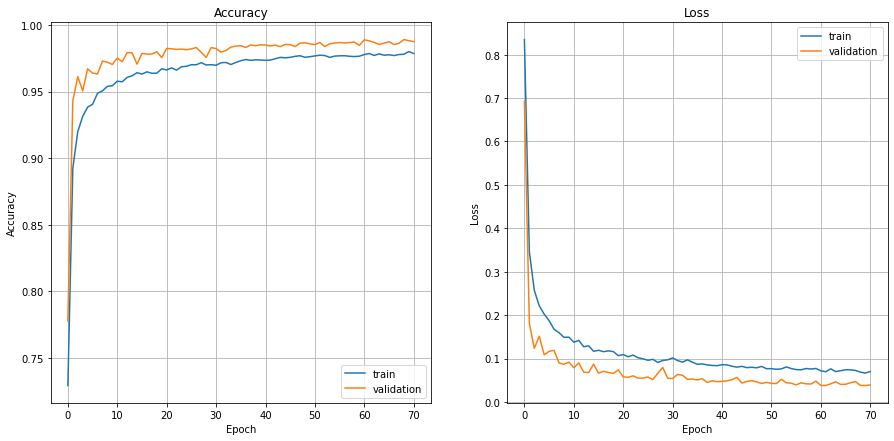

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['train', 'validation'], loc='lower right')
ax[0].grid()
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['train', 'validation'], loc='upper right')
ax[1].grid()
plt.show()

In [16]:
test = np.array(test).reshape(-1, 28, 28 , 1) / 255
preds = model.predict(test)